# Preparação e análise de Dados em Python #

Nesta aula, aprenderemos um pouco a como entender melhor um conjunto de dados. Nos tempos atuais, é cada vez mais fácil conseguir quantidades cada vez maiores de dados. Contudo, isto vem com um custo: quanto mais dados, mais difícil é de __entender__ os mesmos.

Hoje, aprenderemos a utilizar a biblioteca Pandas para manipular dados.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#!pip3 install pandas --user

Na aula de hoje, usaremos uma base de dados sobre número de vendas de jogos de videogame até 2016. Nosso objetivo é entender melhor os dados para na sequência produzir modelos de regressão que melhor prevejam os números de vendas. Baixe o arquivo que está no Colabweb e coloque-o descomprimido na mesma pasta em que está rodando este notebook:

In [44]:
vg = pd.read_csv('Video_Games.csv')
vg

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


O Pandas é uma biblioteca de manipulação de dados. A função read_csv lê __todo__ conteúdo do arquivo e coloca em uma estrutura de dados. Existem funções similares para diversos tipos de arquivos, como `xls` e `json`.

Agora vamos visualizar o conteúdo dos nossos dados. Para isto, usaremos a função head, que mostra os 5 primeiros registros:

In [3]:
#vg.head()
#vg.tail()
vg.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12565,Virtual Chess 64,N64,1998.0,Misc,Titus,0.05,0.01,0.00,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
4357,Walt Disney World Quest: Magical Racing Tour,PS,2000.0,Racing,Eidos Interactive,0.25,0.17,0.00,0.03,0.45,NaN,NaN,NaN,NaN,NaN,NaN
1724,PokéPark Wii: Pikachu's Adventure,Wii,2009.0,Adventure,Nintendo,0.53,0.16,0.42,0.06,1.17,62.0,22.0,7.2,36.0,Creatures Inc.,E
1212,Dark Cloud,PS2,2000.0,Role-Playing,Sony Computer Entertainment,0.83,0.44,0.08,0.19,1.54,80.0,27.0,8.2,99.0,Level 5,T
4776,TNA iMPACT!,PS3,2008.0,Fighting,Midway Games,0.22,0.12,0.00,0.06,0.40,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vg.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Acessando os dados de um jogo especifico:

In [6]:
#vg.loc[130]
#vg2 = vg.loc[[1,5,10,20]]
vg.loc[0:100]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN,NaN,NaN,NaN


Podemos também acessar colunas especificas através dos seus nomes:

In [7]:
#vg[ ['Name','Critic_Score'] ]

vg.Global_Sales

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16719, dtype: float64

Quantos jogos para cada sistema nós temos?

<Axes: xlabel='Genre'>

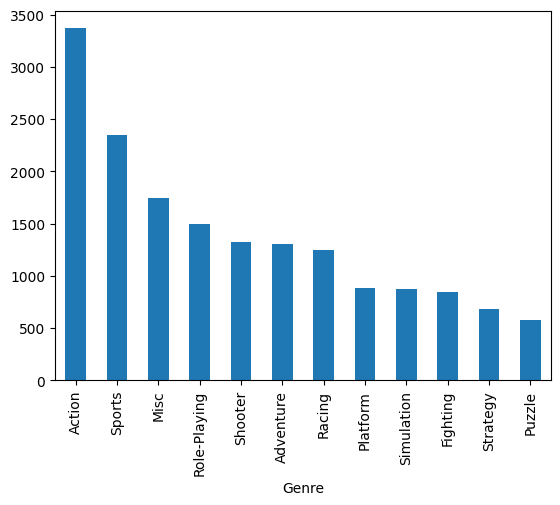

In [ ]:
vg.Genre.value_counts().plot(kind='bar')



Contando a quantidade de valores diferentes de um atributo numérico:

In [9]:
vg.Critic_Score.value_counts()

Critic_Score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64

Muito né? melhor seria colocar em categorias:

In [10]:
b = list(range(0,101,10))
#b
vg.Critic_Score.value_counts(bins=b)


(70.0, 80.0]      2344
(60.0, 70.0]      1949
(80.0, 90.0]      1518
(50.0, 60.0]      1188
(40.0, 50.0]       571
(90.0, 100.0]      257
(30.0, 40.0]       236
(20.0, 30.0]        63
(10.0, 20.0]        11
(-0.001, 10.0]       0
Name: count, dtype: int64

O Pandas oferece vários métodos para entender melhor os dados com estatísticas básicas:

In [11]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Epa! Tem um jogo com lançamento em 2020! Não pode, pois a base é de jogos lançados até 2016. Na verdade, isso é super comum com dados reais, de haver sujeira na base de dados.

E agora, como podemos identificar que jogo é esse ?

In [12]:
vg[vg.Year_of_Release>2016]
#vg.loc[vg.Year_of_Release==2020, ['Year_of_Release']] = [2010]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Conseguiu entender como funcionou? Brinque um pouco com os dados para entender melhor.

Quais são os jogos mais recentes da base para Nintendo Wii?

In [13]:
vg[vg.Platform=='PS2'].sort_values(['Global_Sales','Year_of_Release'],ascending = False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,Polyphony Digital,E
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M
48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,89.0,74.0,8.5,272.0,Polyphony Digital,E


A saída de boa parte de comandos em Pandas gera objetos do tipo dataframe ou series. Estes objetos novos podem ser utilizados com outras funções pandas, em cascata.

Isto são condições compostas

Jogos de PS3 que tiveram mais do que 20 críticas ordenados pela nota da critica:

In [14]:
#vg[(vg.Platform=='PS2')][(vg.Critic_Count>20)].sort_values(['Critic_Score']).head()
vg[(vg.Platform=='PS2') & (vg.Critic_Count>20)].sort_values(['Critic_Score']).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12012,McFarlane's Evil Prophecy,PS2,NaN,Action,Konami Digital Entertainment,0.03,0.03,0.0,0.01,0.07,34.0,28.0,3.2,5.0,Konami,M
5337,Charlie and the Chocolate Factory,PS2,2005.0,Adventure,Global Star,0.17,0.13,0.0,0.04,0.35,35.0,21.0,4.1,28.0,"High Voltage Software, Backbone Entertainment",E
7982,Fight Club,PS2,2004.0,Fighting,Vivendi Games,0.09,0.07,0.0,0.02,0.18,36.0,28.0,4.4,22.0,Genuine Games,M
1230,The Simpsons Skateboarding,PS2,2002.0,Sports,Electronic Arts,0.36,0.90,0.0,0.27,1.52,38.0,21.0,5,26.0,The Code Monkeys,T
3449,Terminator 3: Rise of the Machines,PS2,2003.0,Action,Atari,0.28,0.22,0.0,0.07,0.58,38.0,21.0,6.3,23.0,Black Ops Entertainment,T


Exercício:


1 - Gere uma base vg2, contendo todos os jogos lançados de 2000 a 2016 e a descreva com describe

2 - Mostre todos os jogos lançados até o ano 2000 onde as vendas japonesas foram acima das americanas, ordenado por vendas globais

3 - Conte, para cada plataforma, quantos jogos com nota de usuário acima de 8 cada uma tem

In [49]:
vg ['User_Score'] = pd.to_numeric(vg['User_Score'], errors='coerce')

### Usando pandas para plotar com pyplot ###

Uma coisa legal no pandas é que ele é integrado ao pyplot/matplotlib.

Exemplo: Qual a relação entre as vendas globais e a nota da crítica?

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.48,2.99,0.0,0.73,7.2,49.0,21.0,8,110.0,Ubisoft Paris,E10+


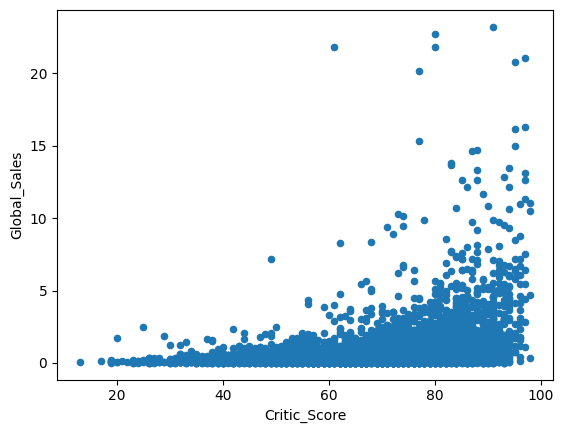

In [25]:
vg[vg.Global_Sales<25].plot(kind='scatter',x='Critic_Score',y='Global_Sales')
#outlier
vg[vg.Global_Sales>80]
vg[(vg.Global_Sales>5) & (vg.Critic_Score<50)]


Os valores muito altos (como o Wii Sports com 80 milhões de cópias), estão dificultando a visualização. Para resolver este problema, podemos ou eliminar estes valores do plot ou plotar em escala logaritmica:

<Axes: xlabel='Critic_Score', ylabel='Global_Sales'>

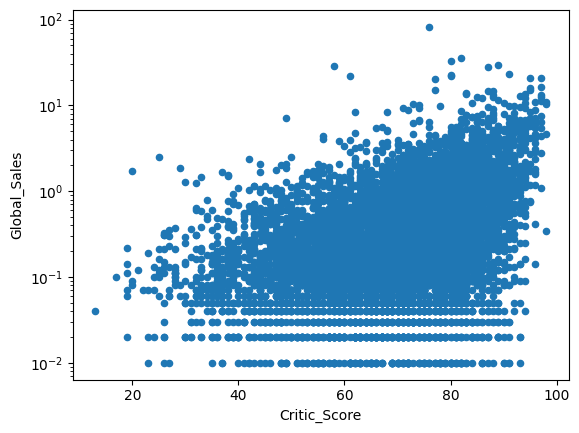

In [16]:
#vg[vg.Global_Sales<20].plot(kind='scatter',x='Critic_Score',y='Global_Sales')

vg.plot(kind='scatter',x='Critic_Score',y='Global_Sales',logy=True)

### Outras correlações mais sofisticadas ###

Como será a comparação entre as notas dos críticos para RPGs em comparação com jogos de corrida?

<Axes: >

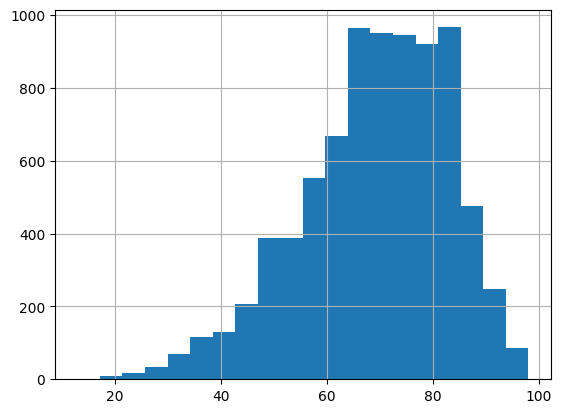

In [17]:
# Primeiro veremos o histograma global
vg.Critic_Score.hist(bins = 20)

<Axes: >

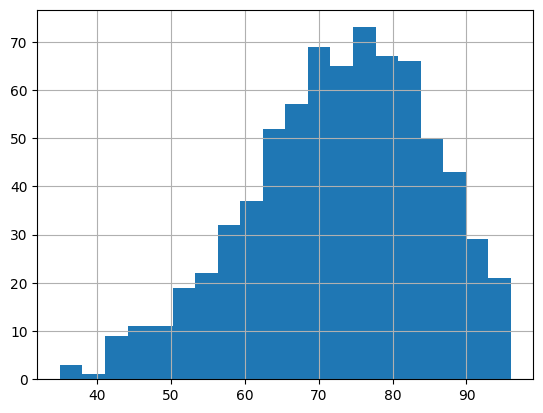

In [26]:
#Agora apenas dos RPGs
vg[vg.Genre=='Role-Playing'].Critic_Score.hist(bins = 20)

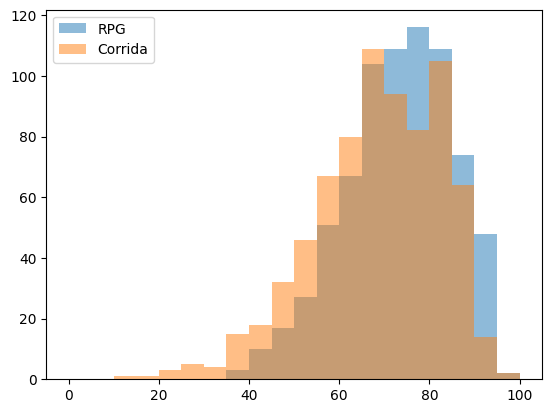

In [27]:
# Podemos comparar os RPGs com os jogos de corrida

bins = list(range(0,101,5))
vgval = vg[vg.Critic_Score.notnull()] # Remover os jogos sem valor de Critic_Score

plt.hist(vgval[vgval.Genre=='Role-Playing'].Critic_Score,bins,alpha=0.5,label='RPG')
plt.hist(vgval[vgval.Genre=='Racing'].Critic_Score,bins,alpha=0.5,label='Corrida')
plt.legend()


E se eu quiser comparar variáveis categóricas?

Vamos analisar duas: Gênero e Plataforma.

In [28]:
pd.crosstab(vg.Platform,vg.Genre,margins = True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,188,38,14,54,28,20,11,88,7,31,26,15,520
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,340,238,36,391,91,236,67,200,42,284,148,79,2152
GB,6,5,0,8,19,15,2,21,1,5,9,7,98
GBA,167,38,23,110,142,41,64,73,40,18,88,18,822
GC,101,20,42,36,73,13,63,27,48,12,110,11,556
GEN,3,2,5,1,7,0,1,3,1,0,3,1,27


E se a gente quisesse esses valores em porcentagens? Podemos então aplicar uma __função lambda__ nos dados:

In [31]:
pd.crosstab(vg.Platform,vg.Genre,margins = True).apply(lambda v:100*v/v[-1],axis = 1)

/var/folders/jl/02kt03gj5n99h1czkswp582c0000gn/T/ipykernel_6596/720799281.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.crosstab(vg.Platform,vg.Genre,margins = True).apply(lambda v:100*v/v[-1],axis = 1)
/var/folders/jl/02kt03gj5n99h1czkswp582c0000gn/T/ipykernel_6596/720799281.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.crosstab(vg.Platform,vg.Genre,margins = True).apply(lambda v:100*v/v[-1],axis = 1)
/var/folders/jl/02kt03gj5n99h1czkswp582c0000gn/T/ipykernel_6596/720799281.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,45.864662,1.503759,1.503759,3.759398,6.766917,8.270677,4.511278,0.000000,18.045113,0.751880,9.022556,0.000000,100.0
3DO,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
3DS,36.153846,7.307692,2.692308,10.384615,5.384615,3.846154,2.115385,16.923077,1.346154,5.961538,5.000000,2.884615,100.0
DC,5.769231,21.153846,23.076923,0.000000,3.846154,0.000000,11.538462,7.692308,5.769231,1.923077,19.230769,0.000000,100.0
DS,15.799257,11.059480,1.672862,18.169145,4.228625,10.966543,3.113383,9.293680,1.951673,13.197026,6.877323,3.671004,100.0
GB,6.122449,5.102041,0.000000,8.163265,19.387755,15.306122,2.040816,21.428571,1.020408,5.102041,9.183673,7.142857,100.0
GBA,20.316302,4.622871,2.798054,13.381995,17.274939,4.987835,7.785888,8.880779,4.866180,2.189781,10.705596,2.189781,100.0
GC,18.165468,3.597122,7.553957,6.474820,13.129496,2.338129,11.330935,4.856115,8.633094,2.158273,19.784173,1.978417,100.0
GEN,11.111111,7.407407,18.518519,3.703704,25.925926,0.000000,3.703704,11.111111,3.703704,0.000000,11.111111,3.703704,100.0


E se eu quiser uma tabela dessas, mas apenas contendo os jogos que venderam mais de 10 milhões de unidades?

In [32]:
pd.crosstab(vg[vg.Global_Sales>10].Platform,vg[vg.Global_Sales>10].Genre,margins = True)#,normalize='index')

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,All
Platform,,,,,,,,,,,,
3DS,0,0,0,0,1,0,1,2,0,0,0,4
DS,1,0,0,1,2,1,1,2,0,2,0,10
GB,0,1,0,0,1,1,0,3,0,0,0,6
GBA,0,0,0,0,0,0,0,2,0,0,0,2
N64,0,0,0,0,1,0,0,0,0,0,0,1
NES,0,0,0,0,2,0,0,0,1,0,0,3
PS,0,0,0,0,0,0,1,0,0,0,0,1
PS2,3,0,0,0,0,0,2,0,0,0,0,5
PS3,2,0,0,0,0,0,1,0,4,0,0,7


## Tabelas Pivo ##

Muitas vezes, queremos cruzar dados de formas mais complexas. A tabela pivo ajuda muito nisso.


Exemplo: Quem teve os melhores RPGs e adventures de acordo com a crítica? O primeiro ou o segundo Playstation?

In [ ]:
rpgs = vg[(vg.Platform.isin(['PS2','PS']))]

#rpgs.head()
pivot = rpgs.pivot_table(values=['Critic_Score', 'Global_Sales'],index = ['Platform','Genre'],aggfunc = ["mean","median", "std"])
pivot

mean                    median               \
                      Critic_Score Global_Sales Critic_Score Global_Sales   
Platform Genre                                                              
PS       Action          67.117647     1.800556         72.0        0.980   
         Adventure       58.000000     0.382000         55.0        0.165   
         Fighting        67.625000     1.116111         69.0        0.345   
         Misc            73.833333     0.990000         70.0        0.220   
         Platform        76.000000     1.149412         72.5        0.620   
         Puzzle          81.000000     0.127500         81.0        0.130   
         Racing          68.310345     1.430690         69.0        0.460   
         Role-Playing    79.428571     1.573929         81.5        0.740   
         Shooter         68.857143     0.413125         72.0        0.140   
         Simulation      79.714286     0.520000         82.0        0.420   
         Sports          73.766667     0.790312         74.5        0.405   
         Strategy        63.800000     0.054000         62.0        0.050   
PS2      Action          66.725100     0.889068         67.0        0.410   
         Adventure       62.348837     0.251731         63.0        0.165   
         Fighting        70.063291     0.784432         72.0        0.375   
         Misc            67.888889     0.566000         71.0        0.245   
         Platform        66.410959     0.663218         66.0        0.410   
         Puzzle          72.636364     0.420769         75.0        0.280   
         Racing          67.055215     0.762270         68.0        0.270   
         Role-Playing    71.639344     0.633071         72.5        0.270   
         Shooter         66.784173     0.706549         68.0        0.275   
         Simulation      70.703704     0.669500         73.0        0.370   
         Sports          72.518672     0.794512         74.0        0.390   
         Strategy        69.512195     0.206585         70.0        0.110   

                               std               
                      Critic_Score Global_Sales  
Platform Genre                                   
PS       Action          21.430317     2.042876  
         Adventure       15.866632     0.568894  
         Fighting        21.419228     1.990980  
         Misc            11.070983     1.372297  
         Platform        11.994443     1.781399  
         Puzzle           2.828427     0.015000  
         Racing          16.913865     2.644860  
         Role-Playing    12.287990     2.299292  
         Shooter         16.013730     0.669962  
         Simulation       7.250616     0.361801  
         Sports          13.895381     1.157579  
         Strategy         8.757854     0.037815  
PS2      Action          13.839080     1.932195  
         Adventure       12.648892     0.332387  
         Fighting        11.880108     0.937073  
         Misc            13.218358     0.925335  
         Platform        12.205231     0.852581  
         Puzzle          11.638494     0.549112  
         Racing          13.645535     1.637861  
         Role-Playing    11.028187     1.253447  
         Shooter         12.979785     1.062062  
         Simulation       9.262686     0.747993  
         Sports          13.802199     1.018789  
         Strategy         7.813840     0.193269

<Axes: ylabel='Platform,Genre'>

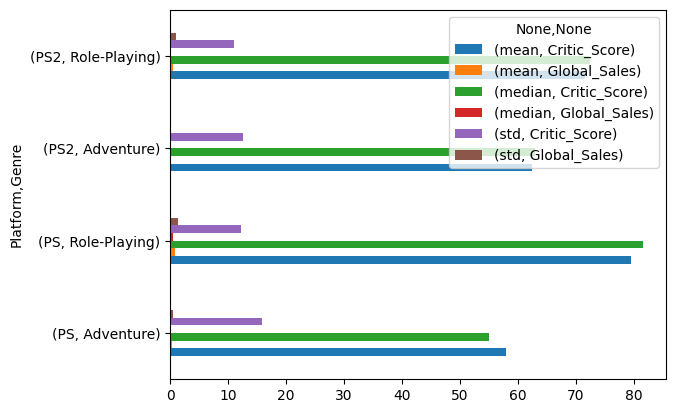

In [37]:
pivot.plot(kind='barh')


Exercício:

Faça uma tabela contendo a media das notas de usuários dos jogos das Publishers Capcom e Activision de acordo com o Rating

In [65]:
rpgs = vg[(vg.Publisher.isin(['Capcom', 'Activion']) ) ]
#rpgs = rpgs[rpgs["Rating"].notnull()]
#rpgs
pivot = rpgs.pivot_table(values=['User_Score'], index=['Publisher', 'Rating'], aggfunc=['mean'])
pivot 

mean
                 User_Score
Publisher Rating           
Capcom    E        7.697500
          E10+     8.125000
          M        7.219277
          T        7.349351

E se eu quiser saber quantas unidades o jogo mais vendido de cada plataforma vendeu?

In [50]:
#quantas unidades o jogo mais vendido de cada plataforma vendeu?
plats = vg[(vg.Platform.isin(['PS3','X360']))]

plats.pivot_table(values=['Global_Sales'],index = ['Platform','Genre'],aggfunc = ["max",])



max
                      Global_Sales
Platform Genre                    
PS3      Action              21.04
         Adventure            4.82
         Fighting             4.16
         Misc                 5.26
         Platform             5.82
         Puzzle               0.40
         Racing              10.70
         Role-Playing         6.41
         Shooter             13.79
         Simulation           1.94
         Sports               6.65
         Strategy             0.78
X360     Action              16.27
         Adventure            5.54
         Fighting             2.94
         Misc                21.81
         Platform             1.38
         Puzzle               0.32
         Racing               5.49
         Role-Playing         8.79
         Shooter             14.73
         Simulation           2.28
         Sports               6.19
         Strategy             2.62

## Agrupando ##

Você pode usar o comando groupby para gerar novas bases de dados modificadas. Por exemplo, você pode tentar prever as vendas totais de plataformas ao invés de jogos individuais. Contudo, para você utilizar os dados agrupados, você deve usar uma função de agregação (sum,count, min,max, mean, etc).

### Exemplo ###

Criando um agrupamento por plataforma

In [66]:
vgplat = vg.groupby(['Platform'])
vgplat.Global_Sales.sum()
vgplat.Critic_Score.min()

Platform
2600     NaN
3DO      NaN
3DS     26.0
DC      80.0
DS      19.0
GB       NaN
GBA     23.0
GC      23.0
GEN      NaN
GG       NaN
N64      NaN
NES      NaN
NG       NaN
PC      33.0
PCFX     NaN
PS      26.0
PS2     24.0
PS3     13.0
PS4     19.0
PSP     28.0
PSV     33.0
SAT      NaN
SCD      NaN
SNES     NaN
TG16     NaN
WS       NaN
Wii     19.0
WiiU    24.0
X360    19.0
XB      19.0
XOne    20.0
Name: Critic_Score, dtype: float64

Fazendo uma regressão para descobrir total de vendas de um console pelo total de jogos lançados para ele:

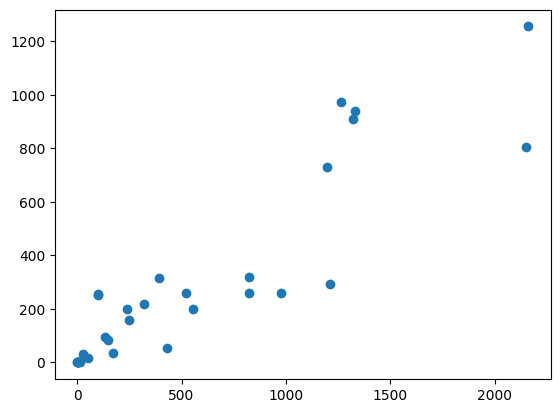

In [67]:
x = vgplat.Name.count()
y = vgplat.Global_Sales.sum()
plt.scatter(x,y)

<Axes: xlabel='Platform'>

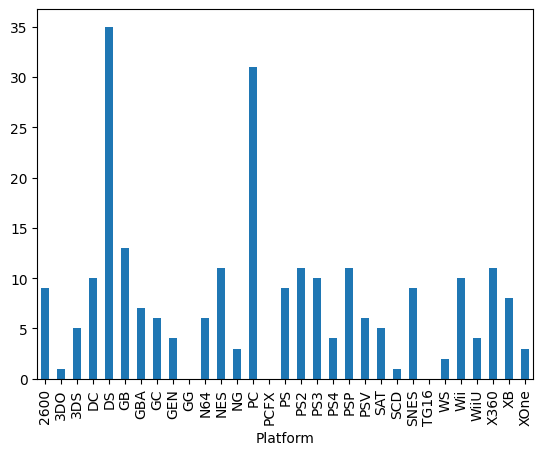

In [68]:
#Total de anos que um console teve jogos

anos = vgplat.Year_of_Release.max() - vgplat.Year_of_Release.min()
anos.plot(kind='bar')

Vocês poderiam usar a informação de ano para ponderar alguma outra informação usada na regressão por exemplo. Contudo, tem algo estranho né? O Nintendo DS está com 35 anos de jogos lançados. Vocês conseguem descobrir o porquê?